In [1]:
from discretize import TreeMesh
from discretize.utils import refine_tree_xyz, active_from_xyz
from SimPEG.utils import mkvc, model_builder
from SimPEG import maps
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Base mesh parameters
dh = 5.0  # base cell size
nbc = 64  # total width of mesh in terms of number of base mesh cells
h = dh * np.ones(nbc)

# Define the base mesh
hx = [(dh, nbc)]
hy = [(dh, nbc)]
hz = [(dh, nbc)]
mesh = TreeMesh([hx, hy, hz], x0="CCC")


# Define topography and refine
# Refine surface topography
[xx, yy] = np.meshgrid(mesh.nodes_x, mesh.nodes_y)
zz = -0 * np.exp((xx**2 + yy**2) / 100**2) + 0
pts = np.c_[mkvc(xx), mkvc(yy), mkvc(zz)]

mesh.refine_surface(pts, -1,padding_cells_by_level=3, finalize=False)



#xp, yp, zp = np.meshgrid([-40.0, 40.0], [-40.0, 40.0], [-60.0, 0.0])
#xyz = np.c_[mkvc(xp), mkvc(yp), mkvc(zp)]
#mesh.refine_bounding_box(xyz, -1, finalize=False)
sphere_center = (0, 0, -50)
sphere_radius = 10
points = np.atleast_2d(sphere_center)
level = 7
mesh.refine_ball(points=points, radii=np.array([sphere_radius * 1.5]), levels=np.array([level]))


mesh.finalize()

In [27]:
mesh

OcTreeMesh: 11.96% filled

Level : Number of cells               Mesh Extent               Cell Widths    
-----------------------           min     ,     max            min   ,   max   
  2   :       16             ---------------------------   --------------------
  3   :       128         x:    -160.0    ,    160.0          5.0    ,    80.0   
  4   :      1012         y:    -160.0    ,    160.0          5.0    ,    80.0   
  5   :      5160         z:    -160.0    ,    160.0          5.0    ,    80.0   
  6   :      25024     
-----------------------
Total :      31340

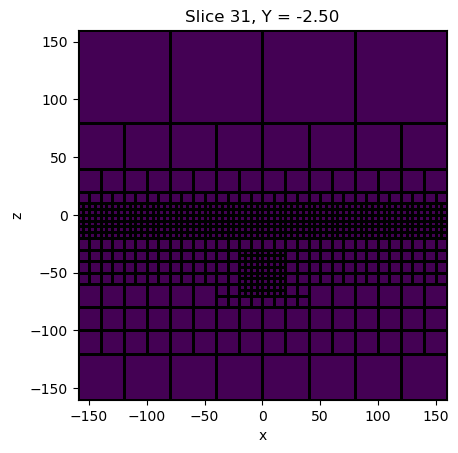

In [28]:
mesh.plot_slice(np.ones(mesh.n_cells), grid=True, normal="y", slice_loc=0)
plt.gca().set_aspect("equal")
#plt.plot(xx[0], -3 * np.exp((xx[0]**2 + 0) / 100**2), color='C1')
plt.show()

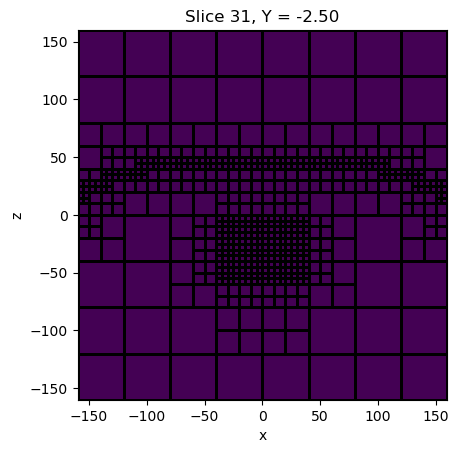

In [14]:
dx = 5  # minimum cell width (base mesh cell width) in x
dy = 5  # minimum cell width (base mesh cell width) in y
dz = 5  # minimum cell width (base mesh cell width) in z

x_length = 300.0  # domain width in x
y_length = 300.0  # domain width in y
z_length = 300.0  # domain width in y

# Compute number of base mesh cells required in x and y
nbcx = 2 ** int(np.round(np.log(x_length / dx) / np.log(2.0)))
nbcy = 2 ** int(np.round(np.log(y_length / dy) / np.log(2.0)))
nbcz = 2 ** int(np.round(np.log(z_length / dz) / np.log(2.0)))

# Define the base mesh
hx = [(dx, nbcx)]
hy = [(dy, nbcy)]
hz = [(dz, nbcz)]
mesh = TreeMesh([hx, hy, hz], x0="CCC")

# Refine surface topography
[xx, yy] = np.meshgrid(mesh.nodes_x, mesh.nodes_y)
zz = -3 * np.exp((xx**2 + yy**2) / 100**2) + 50.0
pts = np.c_[mkvc(xx), mkvc(yy), mkvc(zz)]

mesh.refine_surface(pts, -1, finalize=False)

# Refine box
xp, yp, zp = np.meshgrid([-40.0, 40.0], [-40.0, 40.0], [-60.0, 0.0])
xyz = np.c_[mkvc(xp), mkvc(yp), mkvc(zp)]
mesh.refine_bounding_box(xyz, -1, finalize=False)
mesh.finalize()

mesh.plot_slice(np.ones(mesh.n_cells), grid=True, normal="y", slice_loc=0)
plt.gca().set_aspect("equal")

In [15]:
hx

[(5, 64)]